In [13]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
from utils.discrete import *
import ot

/tmp/ipykernel_2585796/2678013854.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipykernel_2585796/2678013854.py:59: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


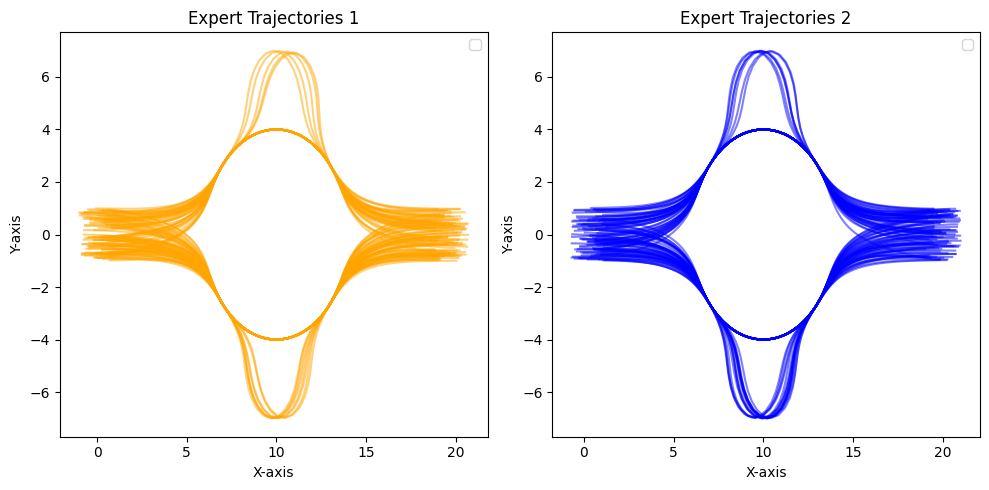

In [14]:
# Loading training trajectories
all_points1 = []    # want modes 1, 2, 4, 6
all_points2 = []    # want modes 1, 2, 3, 5
with open('data/trajs_noise1.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        x1, y1 = float(row[4]), float(row[5])
        x2, y2 = float(row[7]), float(row[8])
        all_points1.append([x1, y1])
        all_points2.append([x2, y2])

num_trajectories = 1000
points_per_trajectory = 100

expert_data1 = [
    all_points1[i * points_per_trajectory:(i + 1) * points_per_trajectory]
    for i in range(num_trajectories)
]
first_trajectory1 = expert_data1[0]
x1 = [point[0] for point in first_trajectory1]
y1 = [point[1] for point in first_trajectory1]

expert_data2 = [
    all_points2[i * points_per_trajectory:(i + 1) * points_per_trajectory]
    for i in range(num_trajectories)
]
first_trajectory2 = expert_data2[0]
x2 = [point[0] for point in first_trajectory2]
y2 = [point[1] for point in first_trajectory2]

expert_data1 = np.array(expert_data1)
expert_data2 = np.array(expert_data2)

n_traj = 100

# randomly select trajectories from the expert data
np.random.seed(10)  # for reproducibility
indices = np.random.choice(num_trajectories, size=n_traj, replace=False)
expert_data_rand1 = expert_data1[indices]
expert_data_rand2 = expert_data2[indices]

# Plotting the trajectories
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Expert Trajectories 1")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in expert_data_rand1:
    plt.plot([point[0] for point in trajectory], [point[1] for point in trajectory], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')
plt.legend()
plt.subplot(1, 2, 2)
plt.title("Expert Trajectories 2")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in expert_data_rand2:
    plt.plot([point[0] for point in trajectory], [point[1] for point in trajectory], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')
plt.legend()   
plt.tight_layout()

In [15]:
# load the diffusion data and mlp data

load_path_ours = "sampled_trajs/ours_seed0"
load_path_vanilla = "sampled_trajs/vanillaCTDE_seed0"
load_path_magail_vary_init = "sampled_trajs/magail_seed0/vary_init"
load_path_magail_static_init = "sampled_trajs/magail_seed0/static_init"
load_path_bc = "sampled_trajs/bc_seed0"
load_path_ours_expertinfo = "sampled_trajs/ours_extrainfo_seed70"
load_path_vanilla_expertinfo = "sampled_trajs/vanillaCTDE_extrainfo_seed70"
load_path_magail_vary_init_expertinfo = "sampled_trajs/magail_extrainfo_seed70/vary_init"
load_path_magail_static_init_expertinfo = "sampled_trajs/magail_extrainfo_seed70/static_init"
load_path_bc_expertinfo = "sampled_trajs/bc_extrainfo_seed70"

ours1 = []
ours2 = []
vanilla1 = []
vanilla2 = []
magail_vary_init1 = []
magail_vary_init2 = []
magail_static_init1 = []
magail_static_init2 = []
bc1 = []
bc2 = []
ours_expertinfo1 = []
ours_expertinfo2 = []
vanilla_expertinfo1 = []
vanilla_expertinfo2 = []
magail_vary_init_expertinfo1 = []
magail_vary_init_expertinfo2 = []
magail_static_init_expertinfo1 = []
magail_static_init_expertinfo2 = []
bc_expertinfo1 = []
bc_expertinfo2 = []

for i in range(n_traj):
    ours1.append(np.load(load_path_ours + "/" + f"mpc_traj1_{i}.npy"))
    ours2.append(np.load(load_path_ours + "/" + f"mpc_traj2_{i}.npy"))
    vanilla1.append(np.load(load_path_vanilla + "/" + f"mpc_traj1_{i}.npy"))
    vanilla2.append(np.load(load_path_vanilla + "/" + f"mpc_traj2_{i}.npy"))
    magail_vary_init1.append(np.load(load_path_magail_vary_init + "/" + f"mpc_traj1_{i}.npy"))
    magail_vary_init2.append(np.load(load_path_magail_vary_init + "/" + f"mpc_traj2_{i}.npy"))
    magail_static_init1.append(np.load(load_path_magail_static_init + "/" + f"mpc_traj1_{i}.npy"))
    magail_static_init2.append(np.load(load_path_magail_static_init + "/" + f"mpc_traj2_{i}.npy"))
    bc1.append(np.load(load_path_bc + "/" + f"mpc_traj1_{i}.npy"))
    bc2.append(np.load(load_path_bc + "/" + f"mpc_traj2_{i}.npy"))
    ours_expertinfo1.append(np.load(load_path_ours_expertinfo + "/" + f"mpc_traj1_{i}.npy"))
    ours_expertinfo2.append(np.load(load_path_ours_expertinfo + "/" + f"mpc_traj2_{i}.npy"))
    vanilla_expertinfo1.append(np.load(load_path_vanilla_expertinfo + "/" + f"mpc_traj1_{i}.npy"))
    vanilla_expertinfo2.append(np.load(load_path_vanilla_expertinfo + "/" + f"mpc_traj2_{i}.npy"))
    magail_vary_init_expertinfo1.append(np.load(load_path_magail_vary_init_expertinfo + "/" + f"mpc_traj1_{i}.npy"))
    magail_vary_init_expertinfo2.append(np.load(load_path_magail_vary_init_expertinfo + "/" + f"mpc_traj2_{i}.npy"))
    magail_static_init_expertinfo1.append(np.load(load_path_magail_static_init_expertinfo + "/" + f"mpc_traj1_{i}.npy"))
    magail_static_init_expertinfo2.append(np.load(load_path_magail_static_init_expertinfo + "/" + f"mpc_traj2_{i}.npy"))
    bc_expertinfo1.append(np.load(load_path_bc_expertinfo + "/" + f"mpc_traj1_{i}.npy"))
    bc_expertinfo2.append(np.load(load_path_bc_expertinfo + "/" + f"mpc_traj2_{i}.npy"))

ours1 = np.array(ours1)
ours2 = np.array(ours2)
vanilla1 = np.array(vanilla1)
vanilla2 = np.array(vanilla2)
magail_vary_init1 = np.array(magail_vary_init1)
magail_vary_init2 = np.array(magail_vary_init2)
magail_static_init1 = np.array(magail_static_init1)
magail_static_init2 = np.array(magail_static_init2)
bc1 = np.array(bc1)
bc2 = np.array(bc2)
ours_expertinfo1 = np.array(ours_expertinfo1)
ours_expertinfo2 = np.array(ours_expertinfo2)
vanilla_expertinfo1 = np.array(vanilla_expertinfo1)
vanilla_expertinfo2 = np.array(vanilla_expertinfo2)
magail_vary_init_expertinfo1 = np.array(magail_vary_init_expertinfo1)
magail_vary_init_expertinfo2 = np.array(magail_vary_init_expertinfo2)
magail_static_init_expertinfo1 = np.array(magail_static_init_expertinfo1)
magail_static_init_expertinfo2 = np.array(magail_static_init_expertinfo2)
bc_expertinfo1 = np.array(bc_expertinfo1)
bc_expertinfo2 = np.array(bc_expertinfo2)

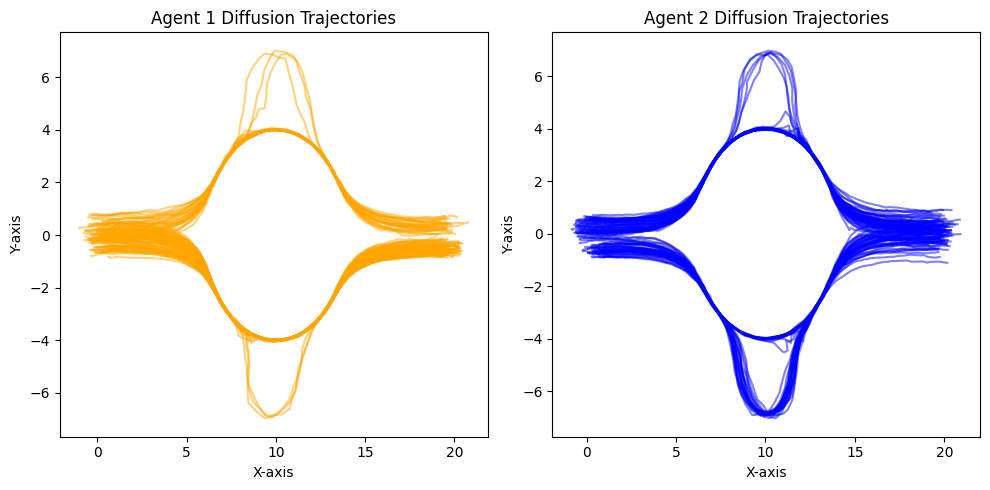

In [16]:
# Plotting diffusion trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Agent 1 Diffusion Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data1:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in ours1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')

plt.subplot(1, 2, 2)
plt.title("Agent 2 Diffusion Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data2:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in ours2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')

plt.tight_layout()

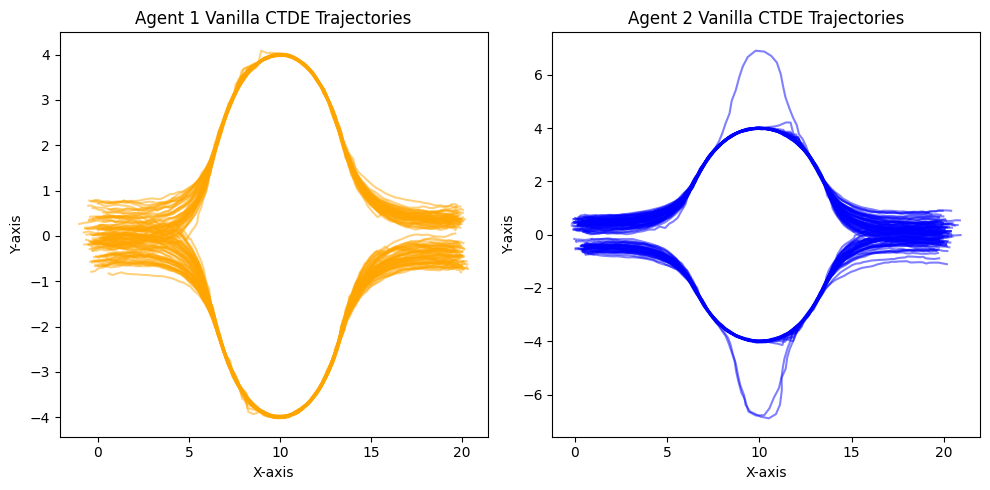

In [17]:
# Plotting vanilla CTDE trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
plt.title("Agent 1 Vanilla CTDE Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

for trajectory in vanilla1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')

plt.subplot(1, 2, 2)
plt.title("Agent 2 Vanilla CTDE Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
for trajectory in vanilla2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')


plt.tight_layout()

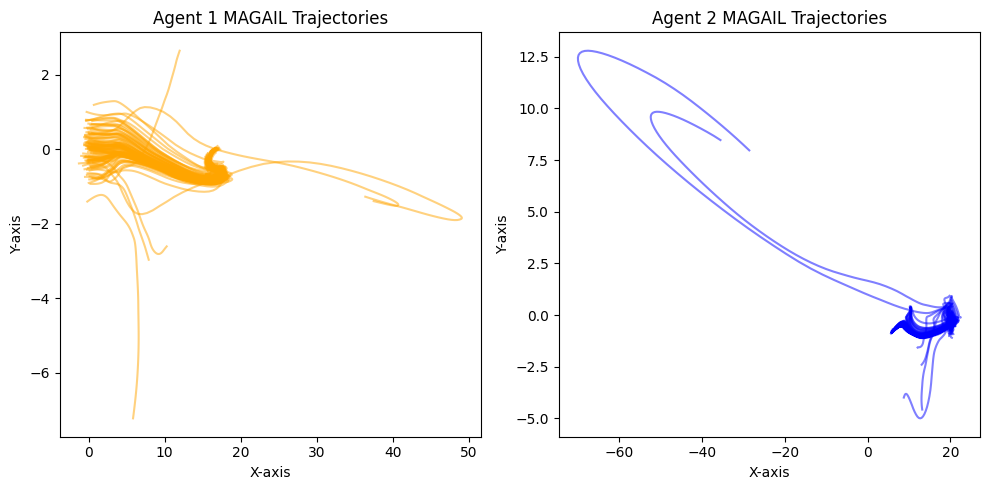

In [18]:
# Plotting magail trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Agent 1 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data1:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in magail_vary_init1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')

plt.subplot(1, 2, 2)
plt.title("Agent 2 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data2:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in magail_vary_init2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')

plt.tight_layout()

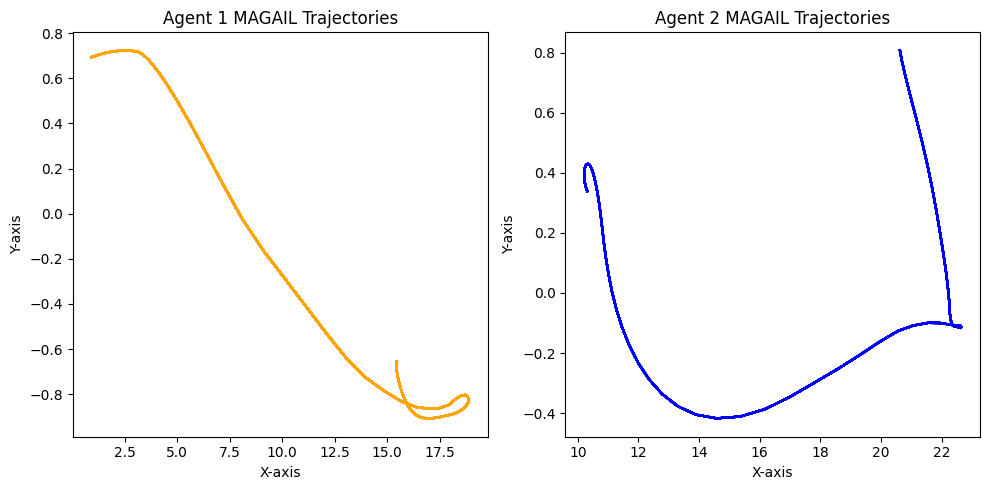

In [19]:
# Plotting magail trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Agent 1 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data1:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in magail_static_init1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')

plt.subplot(1, 2, 2)
plt.title("Agent 2 MAGAIL Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data2:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in magail_static_init2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')

plt.tight_layout()

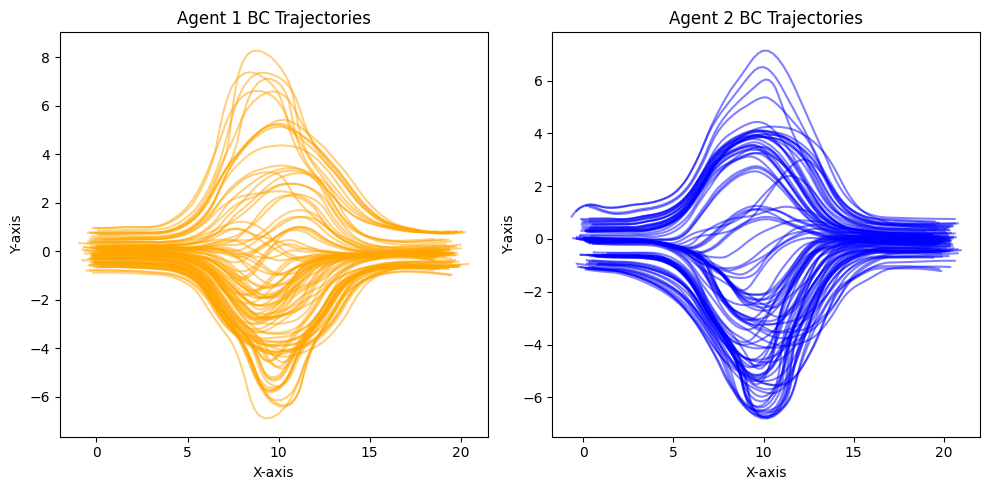

In [20]:
# Plotting bc trajectories

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Agent 1 BC Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data1:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in bc1:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
# plt.scatter(x1, y1, color='red', label='First Trajectory')

plt.subplot(1, 2, 2)
plt.title("Agent 2 BC Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
# for trajectory in mlp_gnn_data2:
#     plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='orange')
for trajectory in bc2:
    plt.plot(trajectory[:, 0], trajectory[:, 1], alpha=0.5, color='blue')
# plt.scatter(x2, y2, color='red', label='First Trajectory')

plt.tight_layout()

In [24]:
np.random.seed(10)  # for reproducibility (20, )
indices = np.random.choice(num_trajectories, size=n_traj, replace=False)
expert_data_rand1 = expert_data1[indices]
expert_data_rand2 = expert_data2[indices]

In [25]:
# compute frechet distance between the trajectories from expert and diffusion_gnn
fast_frechet = FastDiscreteFrechetMatrix(euclidean)

D_ours1 = np.zeros((n_traj,n_traj))
D_ours2 = np.zeros((n_traj,n_traj))

D_vanilla1 = np.zeros((n_traj,n_traj))
D_vanilla2 = np.zeros((n_traj,n_traj))

D_magail_vary_init1 = np.zeros((n_traj,n_traj))
D_magail_vary_init2 = np.zeros((n_traj,n_traj))

D_magail_static_init1 = np.zeros((n_traj,n_traj))
D_magail_static_init2 = np.zeros((n_traj,n_traj))

D_bc1 = np.zeros((n_traj,n_traj))
D_bc2 = np.zeros((n_traj,n_traj))

D_ours_expertinfo1 = np.zeros((n_traj,n_traj))
D_ours_expertinfo2 = np.zeros((n_traj,n_traj))

D_vanilla_expertinfo1 = np.zeros((n_traj,n_traj))
D_vanilla_expertinfo2 = np.zeros((n_traj,n_traj))

D_magail_vary_init_expertinfo1 = np.zeros((n_traj,n_traj))
D_magail_vary_init_expertinfo2 = np.zeros((n_traj,n_traj))

D_magail_static_init_expertinfo1 = np.zeros((n_traj,n_traj))
D_magail_static_init_expertinfo2 = np.zeros((n_traj,n_traj))

D_bc_expertinfo1 = np.zeros((n_traj,n_traj))
D_bc_expertinfo2 = np.zeros((n_traj,n_traj))

for i in range(n_traj):
    for j in range(n_traj):
        D_ours1[i,j] = fast_frechet.distance(expert_data_rand1[i], ours1[j])
        D_ours2[i,j] = fast_frechet.distance(expert_data_rand2[i], ours2[j])
        D_vanilla1[i,j] = fast_frechet.distance(expert_data_rand1[i], vanilla1[j])
        D_vanilla2[i,j] = fast_frechet.distance(expert_data_rand2[i], vanilla2[j])
        D_magail_vary_init1[i,j] = fast_frechet.distance(expert_data_rand1[i], magail_vary_init1[j])
        D_magail_vary_init2[i,j] = fast_frechet.distance(expert_data_rand2[i], magail_vary_init2[j])
        D_magail_static_init1[i,j] = fast_frechet.distance(expert_data_rand1[i], magail_static_init1[j])
        D_magail_static_init2[i,j] = fast_frechet.distance(expert_data_rand2[i], magail_static_init2[j])
        D_bc1[i,j] = fast_frechet.distance(expert_data_rand1[i], bc1[j])
        D_bc2[i,j] = fast_frechet.distance(expert_data_rand2[i], bc2[j])
        D_ours_expertinfo1[i,j] = fast_frechet.distance(expert_data_rand1[i], ours_expertinfo1[j])
        D_ours_expertinfo2[i,j] = fast_frechet.distance(expert_data_rand2[i], ours_expertinfo2[j])
        D_vanilla_expertinfo1[i,j] = fast_frechet.distance(expert_data_rand1[i], vanilla_expertinfo1[j])
        D_vanilla_expertinfo2[i,j] = fast_frechet.distance(expert_data_rand2[i], vanilla_expertinfo2[j])
        D_magail_vary_init_expertinfo1[i,j] = fast_frechet.distance(expert_data_rand1[i], magail_vary_init_expertinfo1[j])
        D_magail_vary_init_expertinfo2[i,j] = fast_frechet.distance(expert_data_rand2[i], magail_vary_init_expertinfo2[j])
        D_magail_static_init_expertinfo1[i,j] = fast_frechet.distance(expert_data_rand1[i], magail_static_init_expertinfo1[j])
        D_magail_static_init_expertinfo2[i,j] = fast_frechet.distance(expert_data_rand2[i], magail_static_init_expertinfo2[j])
        D_bc_expertinfo1[i,j] = fast_frechet.distance(expert_data_rand1[i], bc_expertinfo1[j])
        D_bc_expertinfo2[i,j] = fast_frechet.distance(expert_data_rand2[i], bc_expertinfo2[j])


w1 = np.ones(n_traj) / n_traj
w2 = np.ones(n_traj) / n_traj

# compute the optimal transport distance between the trajectories from expert and ours
ot_dist1 = ot.emd2(w1, w2, D_ours1)
ot_dist2 = ot.emd2(w1, w2, D_ours2)
print("Optimal Transport distance between expert and ours trajectories Agent-1: ", ot_dist1)
print("Optimal Transport distance between expert and ours trajectories Agent-2: ", ot_dist2)

# compute the optimal transport distance between the trajectories from expert and vanilla
ot_dist1 = ot.emd2(w1, w2, D_vanilla1)
ot_dist2 = ot.emd2(w1, w2, D_vanilla2)
print("Optimal Transport distance between expert and vanilla trajectories Agent-1: ", ot_dist1)
print("Optimal Transport distance between expert and vanilla trajectories Agent-2: ", ot_dist2)

# compute the optimal transport distance between the trajectories from expert and magail_vary_init
ot_dist1 = ot.emd2(w1, w2, D_magail_vary_init1)
ot_dist2 = ot.emd2(w1, w2, D_magail_vary_init2)
print("Optimal Transport distance between expert and magail_vary_init trajectories Agent-1: ", ot_dist1)
print("Optimal Transport distance between expert and magail_vary_init trajectories Agent-2: ", ot_dist2)

# compute the optimal transport distance between the trajectories from expert and magail_static_init
ot_dist1 = ot.emd2(w1, w2, D_magail_static_init1)
ot_dist2 = ot.emd2(w1, w2, D_magail_static_init2)
print("Optimal Transport distance between expert and magail_static_init trajectories Agent-1: ", ot_dist1)
print("Optimal Transport distance between expert and magail_static_init trajectories Agent-2: ", ot_dist2)

# compute the optimal transport distance between the trajectories from expert and bc
ot_dist1 = ot.emd2(w1, w2, D_bc1)
ot_dist2 = ot.emd2(w1, w2, D_bc2)
print("Optimal Transport distance between expert and bc trajectories Agent-1: ", ot_dist1)
print("Optimal Transport distance between expert and bc trajectories Agent-2: ", ot_dist2)

# compute the optimal transport distance between the trajectories from expert and ours with expert info
ot_dist1 = ot.emd2(w1, w2, D_ours_expertinfo1)
ot_dist2 = ot.emd2(w1, w2, D_ours_expertinfo2)
print("Optimal Transport distance between expert and ours trajectories with expert info Agent-1: ", ot_dist1)
print("Optimal Transport distance between expert and ours trajectories with expert info Agent-2: ", ot_dist2)

# compute the optimal transport distance between the trajectories from expert and vanilla with expert info
ot_dist1 = ot.emd2(w1, w2, D_vanilla_expertinfo1)
ot_dist2 = ot.emd2(w1, w2, D_vanilla_expertinfo2)
print("Optimal Transport distance between expert and vanilla trajectories with expert info Agent-1: ", ot_dist1)
print("Optimal Transport distance between expert and vanilla trajectories with expert info Agent-2: ", ot_dist2)

# compute the optimal transport distance between the trajectories from expert and magail_vary_init with expert info
ot_dist1 = ot.emd2(w1, w2, D_magail_vary_init_expertinfo1)
ot_dist2 = ot.emd2(w1, w2, D_magail_vary_init_expertinfo2)
print("Optimal Transport distance between expert and magail_vary_init trajectories with expert info Agent-1: ", ot_dist1)
print("Optimal Transport distance between expert and magail_vary_init trajectories with expert info Agent-2: ", ot_dist2)

# compute the optimal transport distance between the trajectories from expert and magail_static_init with expert info
ot_dist1 = ot.emd2(w1, w2, D_magail_static_init_expertinfo1)
ot_dist2 = ot.emd2(w1, w2, D_magail_static_init_expertinfo2)
print("Optimal Transport distance between expert and magail_static_init trajectories with expert info Agent-1: ", ot_dist1)
print("Optimal Transport distance between expert and magail_static_init trajectories with expert info Agent-2: ", ot_dist2)

# compute the optimal transport distance between the trajectories from expert and bc with expert info
ot_dist1 = ot.emd2(w1, w2, D_bc_expertinfo1)
ot_dist2 = ot.emd2(w1, w2, D_bc_expertinfo2)
print("Optimal Transport distance between expert and bc trajectories with expert info Agent-1: ", ot_dist1)
print("Optimal Transport distance between expert and bc trajectories with expert info Agent-2: ", ot_dist2)

Optimal Transport distance between expert and ours trajectories Agent-1:  1.499857710506162
Optimal Transport distance between expert and ours trajectories Agent-2:  1.2367408717593804
Optimal Transport distance between expert and vanilla trajectories Agent-1:  1.2029834437828748
Optimal Transport distance between expert and vanilla trajectories Agent-2:  1.7387620543615103
Optimal Transport distance between expert and magail_vary_init trajectories Agent-1:  4.6737399576539005
Optimal Transport distance between expert and magail_vary_init trajectories Agent-2:  7.987006800792247
Optimal Transport distance between expert and magail_static_init trajectories Agent-1:  4.768451489678548
Optimal Transport distance between expert and magail_static_init trajectories Agent-2:  10.037830234680762
Optimal Transport distance between expert and bc trajectories Agent-1:  1.9273285421116784
Optimal Transport distance between expert and bc trajectories Agent-2:  1.7210858556177502
Optimal Transport d